In [ ]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()
llm = ChatOpenAI(model='gpt-4o-mini')

In [ ]:
from typing_extensions import TypedDict
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

# State
class AgentState(TypedDict): # State의 스키마를 딕셔너리 타입으로 정의함.
    messages: list[Annotated[AnyMessage, add_messages]] # Annotated[타입, 메타데이터]를 통해 해당 타입에 대해 메타데이터를 붙임.
    # AnyMessage는 모든 메시지 타입(HumanMessage, AIMessage, SystemMessage, ToolMessage)의 상위 타입을 타나냄.
    # add_messages는 기존 메시지를 유지한 채, 새로운 메시지를 추가(append)할 수 있도록 해줌.

In [ ]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState) # 해당 State를 공유하는 그래프 빌더(뼈대)를 생성함.

In [ ]:
# Node
def generate(state: AgentState) -> AgentState: 
    messages = state['messages'] # State에 누적된 모든 대화를 가져옴.
    ai_message = llm.invoke(messages) # 메시지 리스트 전체를 LLM의 입력으로 전달함.
    
    return {'messages': [ai_message]}

In [ ]:
graph_builder.add_node('generate', generate) # 해당 노드를 그래프에 추가함.

In [ ]:
from langgraph.graph import START, END
# START: 그래프 실행의 시작을 나타내기 위한 특수 노드
# END: 그래프 실행의 끝을 나타내기 위한 특수 노드

graph_builder.add_edge(START, 'generate') # 해당 노드들을 엣지로 연결함.
graph_builder.add_edge('generate', END)

In [ ]:
graph = graph_builder.compile() # 그래프 빌더를 컴파일하여 그래프 객체를 생성함.

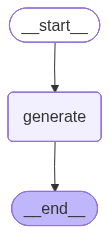

In [ ]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png())) # 내부 그래프를 머메이드 다이어그램으로 변환하여 이미지를 출력함.

In [ ]:
from langchain_core.messages import HumanMessage

query = '인프런에는 어떤 강의가 있나요?'

initial_state = {'messages': [HumanMessage(query)]} # 그래프 실행 시의 초기 상태를 지정함.

graph.invoke(initial_state) # 그래프를 실행함.

{'messages': [AIMessage(content='인프런은 다양한 분야의 온라인 강의를 제공하는 플랫폼입니다. 여기에는 프로그래밍, 데이터 과학, 인공지능, 웹 개발, 모바일 개발, 디자인, 마케팅 등 여러 주제가 포함되어 있습니다. \n\n예를 들어:\n\n1. **프로그래밍**: Python, Java, JavaScript, C++, Ruby 등의 언어 강의\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등의 웹 기술 강의\n3. **데이터 과학**: 데이터 분석, 머신러닝, 딥러닝, 데이터 시각화 등의 과정\n4. **모바일 개발**: Android, iOS 앱 개발 관련 강의\n5. **디자인**: UI/UX 디자인, 그래픽 디자인, 포토샵, 일러스트레이터 강의\n6. **마케팅**: 디지털 마케팅, SEO, 소셜 미디어 마케팅 강의\n\n각 강의는 초급부터 고급까지 다양한 수준으로 제공되며, 강의마다 강사의 설명 및 실습 자료가 포함되어 있습니다. 원하는 분야의 강의를 검색하거나 추천 강의를 확인해보는 것도 좋습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 248, 'prompt_tokens': 18, 'total_tokens': 266, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_ee69c2ef48', 'finish_reason': 'st